In [171]:
import copy
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import defaultdict
from glob import glob
from matplotlib import cm
from matplotlib.pyplot import figure
from matplotlib.dates import HourLocator
from matplotlib.dates import DateFormatter

%matplotlib inline

In [76]:
files = glob('./*wk*.csv')

In [254]:
class StationGraph:
    
    def __init__(self, df_):
        self.df = copy.deepcopy(df_)
        self.name = df_['STATION'].unique()[0]
        self.CA = df_['CA'].unique()  
        
def plot_sum_CA(sg, ax, i):
    df = sg.df.groupby(by=["STATION", "TIME"])['TOTAL_DELTA'].mean().to_frame(name='TOTAL_DELTA_PER_HOUR').reset_index()
    if df['TOTAL_DELTA_PER_HOUR'].max() < 5000:
        ax.plot(df['TIME'], df.TOTAL_DELTA_PER_HOUR, c='grey', alpha=0.1, linewidth=2)
    else:
        ax.plot(df['TIME'], df.TOTAL_DELTA_PER_HOUR, c=plt.cm.get_cmap('hsv', 7)(i), linewidth=3)


In [125]:
stations_dict = defaultdict(dict)
for f in files:
    d = pd.read_csv(f)
    d['TIME'] = pd.to_datetime(d['TIME'].apply(lambda x: x.split(":")[0]), format="%H")
    df_dict = stations_dict[d['STATION'].unique()[0]]
    if 'wknd' in f:
        df_dict['wknd'] = StationGraph(d)
    else:
        df_dict['wkdy'] = StationGraph(d)

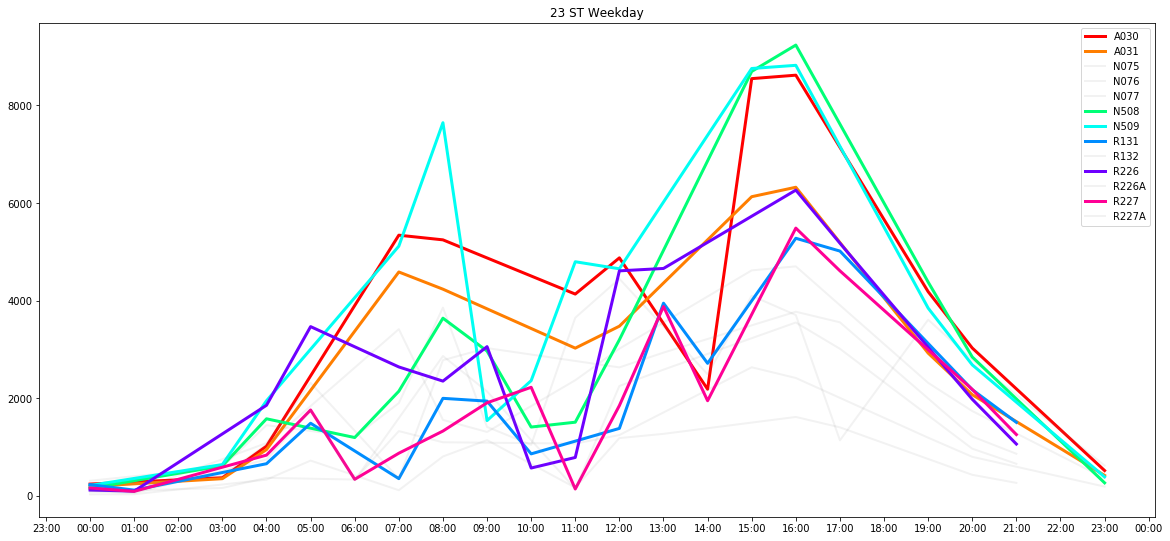

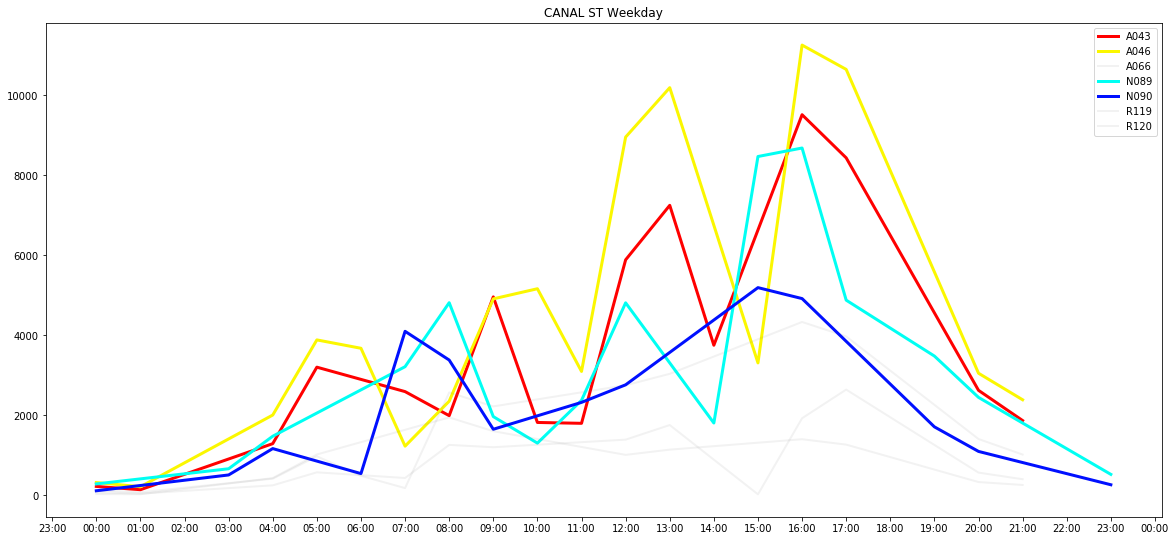

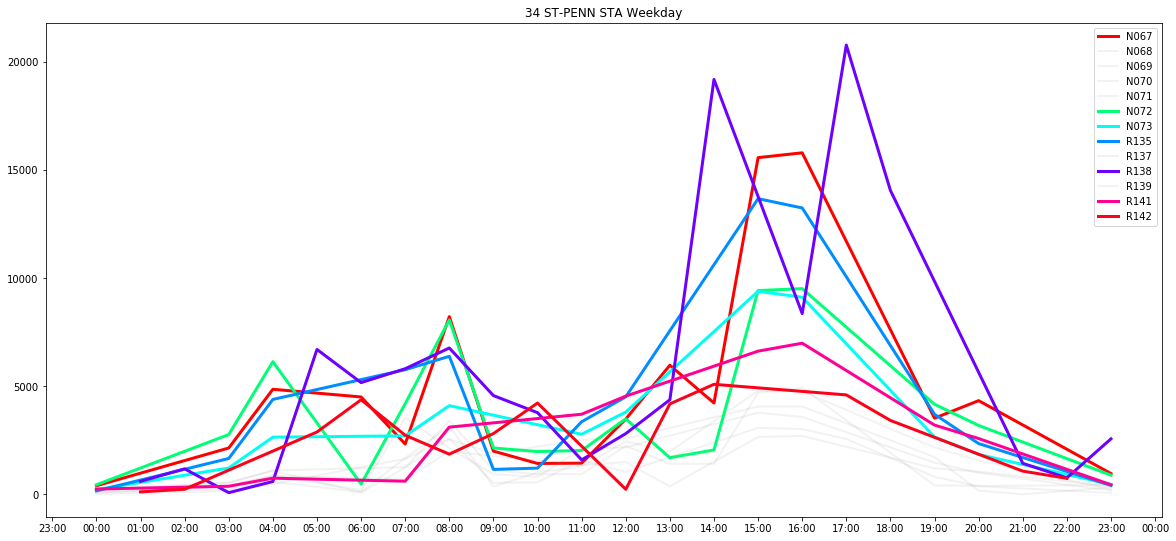

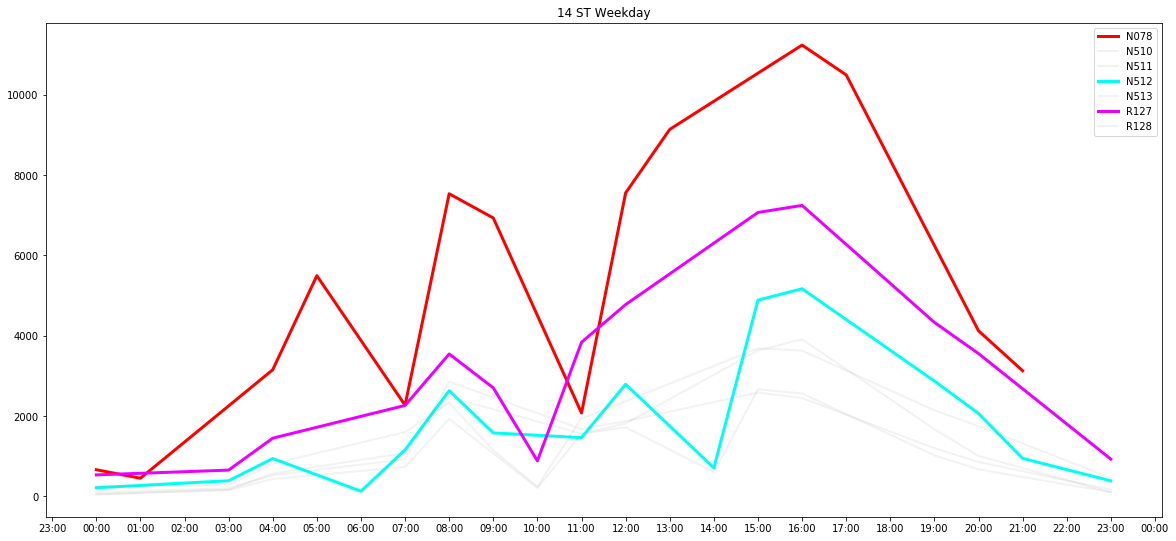

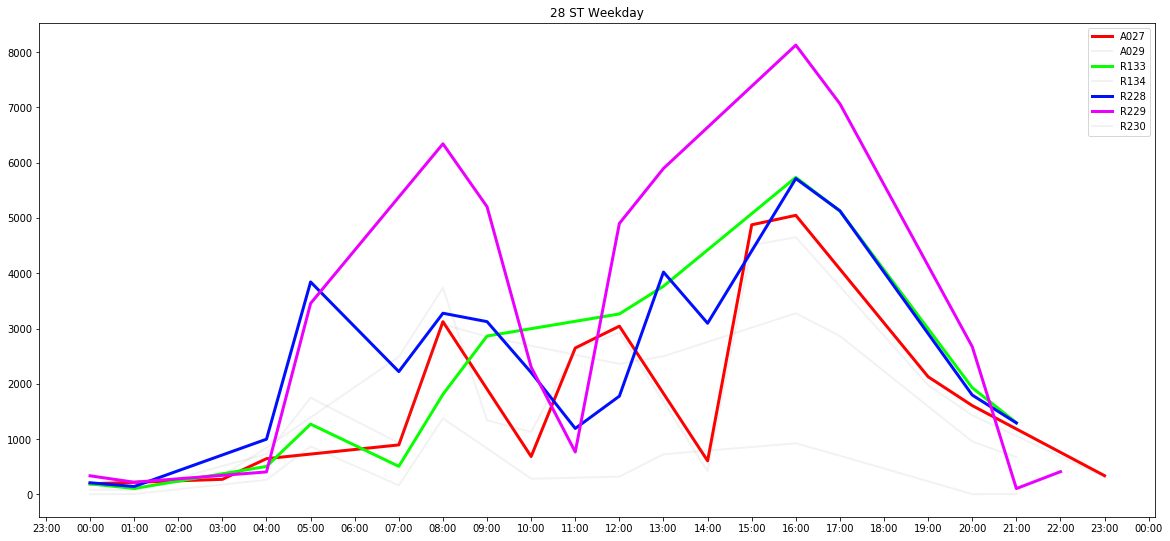

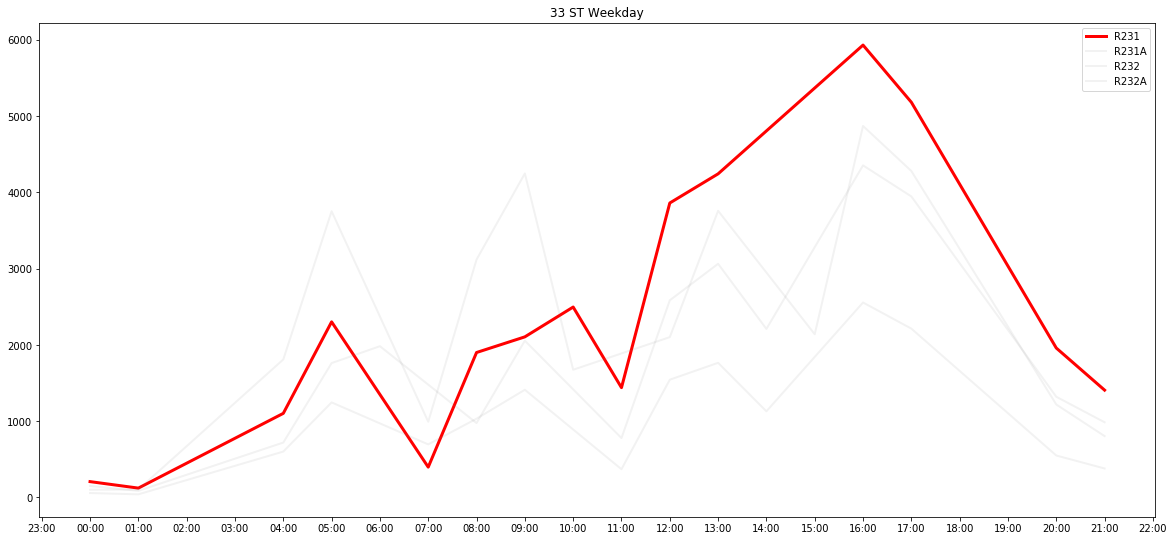

In [302]:
def make_graphs_CA_per_station():
    for name, st in stations_dict.items():
        plt.figure(figsize = [20, 20])
        plot_by_CA(st['wkdy'], plt.subplot(2, 1, 1))
        plt.title(name + " Weekday")
        #plot_by_CA(st['wknd'], plt.subplot(2, 1, 2))
        #plt.title(name + " Weekend")
        plt.show()
        
def plot_by_CA(sg, ax):
    ax.xaxis.set_major_locator(HourLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    
    df = sg.df.groupby(by=["CA", "TIME"])['TOTAL_DELTA'].mean().to_frame(name='TOTAL_DELTA_PER_HOUR').reset_index()
    CA_list = df.CA.unique()
    for i,CA in enumerate(CA_list):
        df_CA = df[df.CA == CA]
        if df_CA['TOTAL_DELTA_PER_HOUR'].max() < 5000:
            ax.plot(df_CA['TIME'], df_CA.TOTAL_DELTA_PER_HOUR, c='grey', alpha=0.1, linewidth=2)
        else:
            ax.plot(df_CA['TIME'], 
                df_CA.TOTAL_DELTA_PER_HOUR, 
                c=plt.cm.get_cmap('hsv', len(CA_list))(i), 
                linewidth=3)    
    plt.legend(df['CA'].unique())
    
make_graphs_CA_per_station()


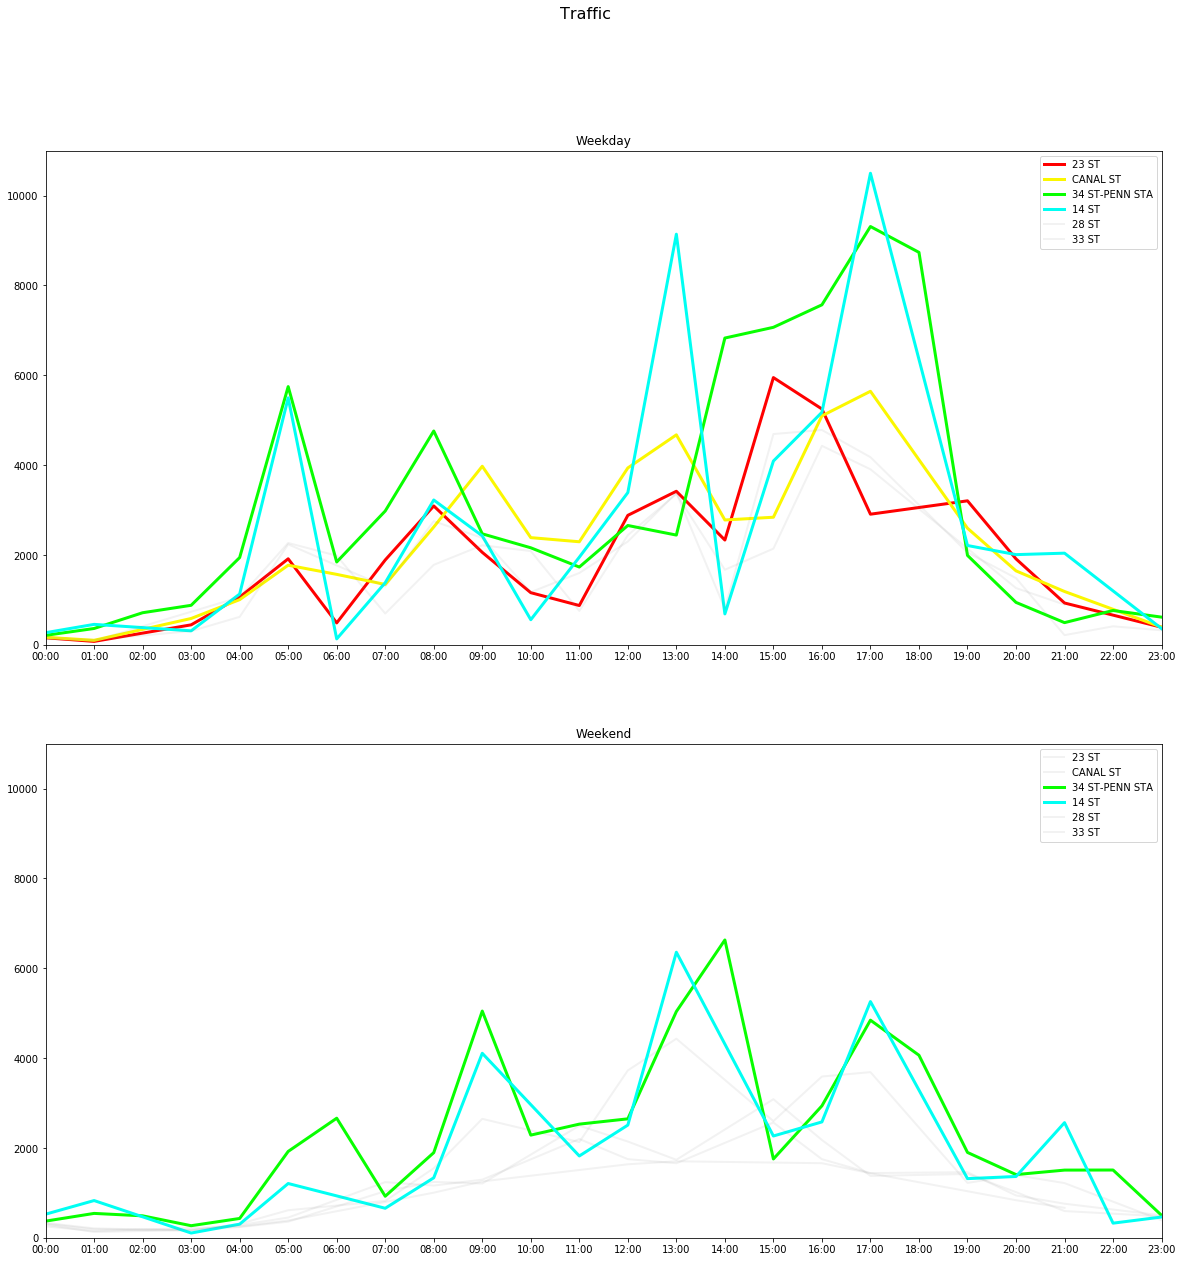

In [256]:
# TODO: cleanup

def make_graphs_sum_CA():
    leg = []
    wkdy = []
    wknd = []
    plt.figure(figsize = [20, 20])
    plt.suptitle("Traffic",fontsize = 16) #suptitle is title of whole charts
    for name, st in stations_dict.items():
        leg.append(name)
        wkdy.append(st['wkdy'])
        wknd.append(st['wknd'])
        
    xlim = [datetime.datetime(year=1900, month=1, day=1, hour=0),
            datetime.datetime(year=1900, month=1, day=1, hour=23)]
        
    ax = plt.subplot(2, 1, 1)
    plt.title("Weekday")
    for st in wkdy:
        plot_sum_CA(st, ax, wkdy.index(st))
    ax.xaxis.set_major_locator(HourLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    ax.set_xlim(xlim)
    ax.set_ylim([0, 11000])
    plt.legend(leg)
    
    ax = plt.subplot(2, 1, 2)
    plt.title("Weekend")
    for st in wknd:
        plot_sum_CA(st, ax, wknd.index(st))
    ax.xaxis.set_major_locator(HourLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    ax.set_xlim(xlim)
    ax.set_ylim([0, 11000])
    plt.legend(leg)
    
make_graphs_sum_CA()

In [78]:

# Example using CA
df1 = pd.DataFrame(df[df['CA'] == 'A043'])
df1 = df1.groupby(by=["STATION", "TIME"])['TOTAL_DELTA'].mean().to_frame(name = 'TOTAL_DELTA_PER_HOUR').reset_index()

df2 = pd.DataFrame(df[df['CA'] == 'A046'])
df2 = df2.groupby(by=["STATION", "TIME"])['TOTAL_DELTA'].mean().to_frame(name = 'TOTAL_DELTA_PER_HOUR').reset_index()

df3 = pd.DataFrame(dfw[dfw['CA'] == 'A043'])
df3 = df3.groupby(by=["STATION", "TIME"])['TOTAL_DELTA'].mean().to_frame(name = 'TOTAL_DELTA_PER_HOUR').reset_index()

df4 = pd.DataFrame(dfw[dfw['CA'] == 'A046'])
df4 = df4.groupby(by=["STATION", "TIME"])['TOTAL_DELTA'].mean().to_frame(name = 'TOTAL_DELTA_PER_HOUR').reset_index()


<Figure size 432x288 with 0 Axes>

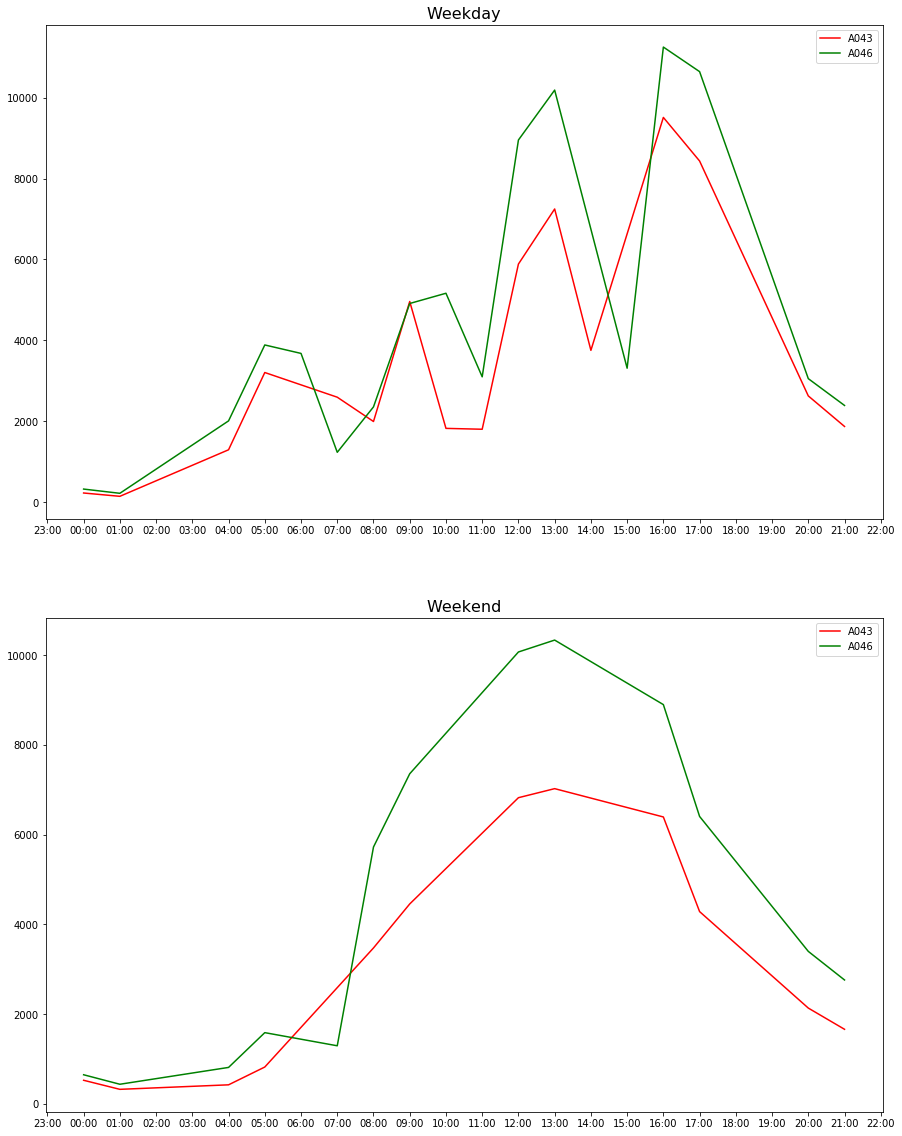

In [79]:
plt.suptitle('Canal St Traffic',fontsize = 16) #suptitle is title of whole charts

plt.figure(figsize = [15, 20])

ax = plt.subplot(2, 1, 1)
plt.title('Weekday',fontsize = 16)
ax.plot(df1['TIME'], df1.TOTAL_DELTA_PER_HOUR,'r')
ax.plot(df2['TIME'], df2.TOTAL_DELTA_PER_HOUR,'g')
ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.legend(['A043','A046'])

ax = plt.subplot(2, 1, 2)
plt.title('Weekend',fontsize = 16)
ax.plot(df3['TIME'], df3.TOTAL_DELTA_PER_HOUR,'r')
ax.plot(df4['TIME'], df4.TOTAL_DELTA_PER_HOUR,'g')
ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.legend(['A043','A046'])

# color maps:

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r